In [232]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [209]:
euro_csv = pd.read_csv('data/eurofxref-hist.csv', parse_dates=['Date'])

In [210]:
filters = (euro_csv['Date'] >= '2021-01-01') & (euro_csv['Date'] <= '2021-12-31')

In [211]:
euro_csv = euro_csv[filters][['Date', 'USD']]\
                .sort_values(by=['Date'])

In [ ]:
euro_csv.head()

### get API data for 2021

In [212]:
url = "https://data.messari.io/api/v1/assets/bitcoin/metrics/price/time-series"

payload={}
headers = {}
_params = {"start":"2021-01-04T01:00:00.000Z",
            "end":"2021-12-31T01:00:00.000Z",
            "interval":"1d",
            "columns":"close",
            "timestamp-format":"rfc3339"}

response = requests.request("GET", url, headers=headers, data=payload, params=_params)

In [214]:
#response.json()

In [215]:
test = pd.DataFrame(response.json()['data']['values'], columns=['Date', 'amount'])

test['Date'] = pd.to_datetime(test['Date']).dt.date.astype('datetime64')

In [217]:
sample_result = euro_csv.merge(test, on='Date')

In [218]:
sample_result['eur'] = sample_result['USD'] * sample_result['amount']

In [223]:
sample_result['rolling_avg'] = sample_result['eur'].rolling(7).mean().shift()

In [221]:
sample_result.head(10)

,Date,USD,amount,eur,rolling_avg
0,2021-01-05,1.2271,34033.028441,41761.929200,NaN
1,2021-01-06,1.2338,36845.427190,45459.888067,NaN
2,2021-01-07,1.2276,39485.038716,48471.833528,NaN
3,2021-01-08,1.2250,40638.663216,49782.362440,NaN
4,2021-01-11,1.2163,35435.651052,43100.382375,NaN
5,2021-01-12,1.2161,34033.127033,41387.685785,NaN
6,2021-01-13,1.2166,37380.057831,45476.578357,45062.951393
7,2021-01-14,1.2124,39115.161696,47423.222040,45871.707513
8,2021-01-15,1.2123,36751.118698,44553.381197,45742.206532
9,2021-01-18,1.2064,36635.737092,44197.353227,45131.566489


In [234]:
sample_result = sample_result.dropna()

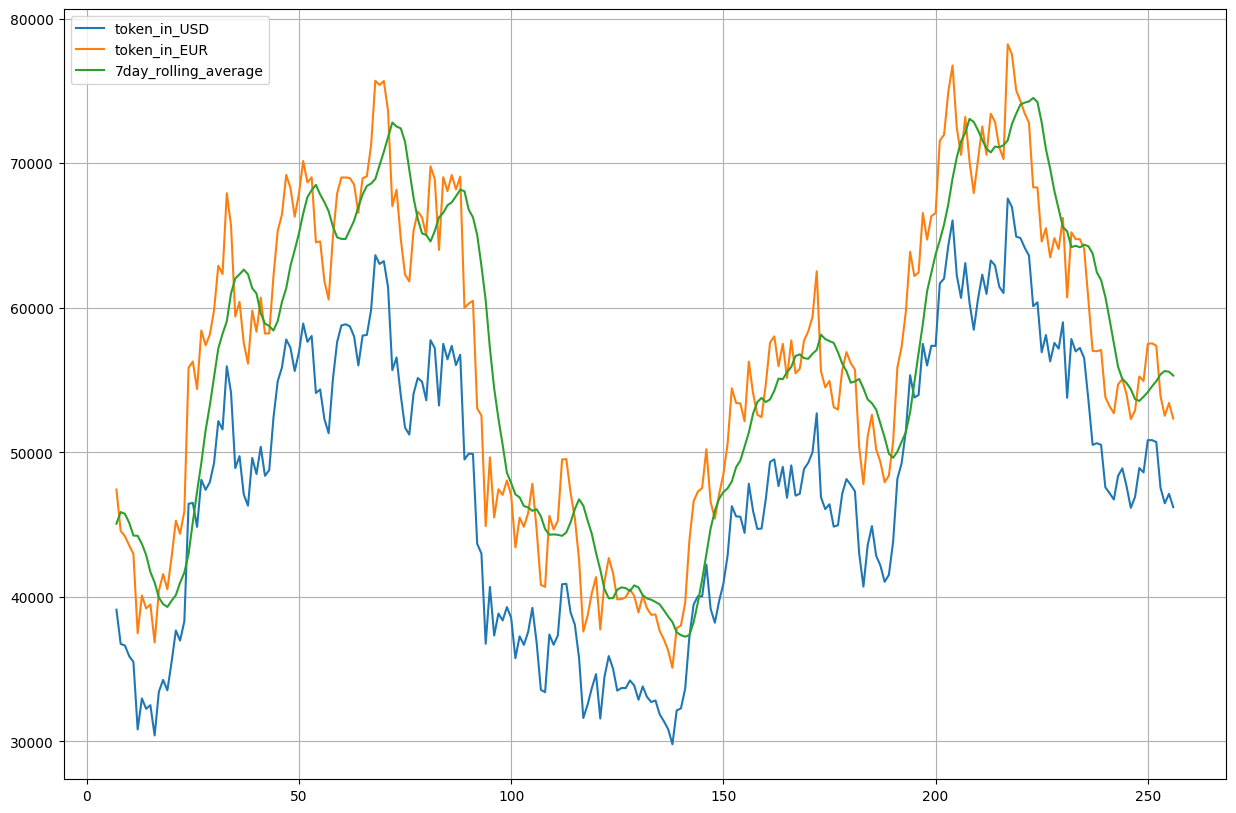

In [235]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(sample_result['amount'], label="token_in_USD")
plt.plot(sample_result['eur'], label="token_in_EUR")
plt.plot(sample_result['rolling_avg'], label="7day_rolling_average")
plt.legend(loc=2)

### plot and figure out

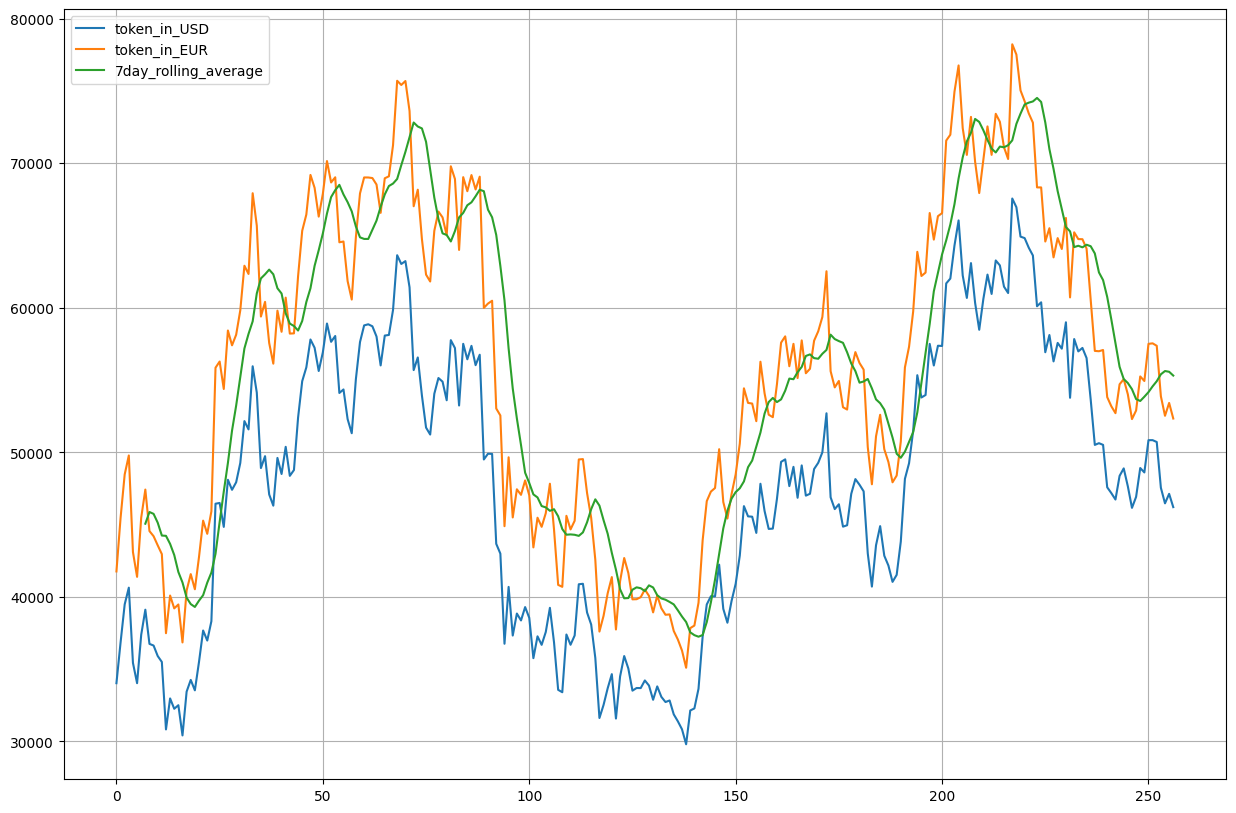

In [233]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(sample_result['amount'], label="token_in_USD")
plt.plot(sample_result['eur'], label="token_in_EUR")
plt.plot(sample_result['rolling_avg'], label="7day_rolling_average")
plt.legend(loc=2)